In [1]:
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from sklearn import datasets


In [3]:
data=datasets.load_breast_cancer()

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x_train,x_test,y_train,y_test=train_test_split(data.data,data.target,random_state=1)

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler=StandardScaler()

In [8]:
scaler.fit(x_train)
x_train=scaler.transform(x_train)

In [9]:
x_test=scaler.transform(x_test)

In [10]:
knn=KNeighborsClassifier()

In [11]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [12]:
#minkowski distance,p=2 ,p=power in minkowski,implies: euclidean, all neighbors hv uniform wt, k=5(n neighbours=5).

In [13]:
knn.score(x_test,y_test)

0.951048951048951

In [14]:
y_pred=knn.predict(x_test)

In [15]:
from sklearn.metrics import classification_report

In [16]:
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93        55
           1       0.94      0.99      0.96        88

   micro avg       0.95      0.95      0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



In [17]:
#two classes , class 0 and class 1. 52 of class 1 have recall value 1, means all 52 of class 1 were predict correctly.
#precision is 0.98. means some of class 2 are predicted as class 1.` So recall of class 2 is 0.99

In [18]:
x_train

array([[ 0.30575375,  2.59521918,  0.46246107, ...,  1.81549702,
         2.10164609,  3.38609913],
       [ 0.23351721, -0.05334893,  0.20573083, ...,  0.5143837 ,
         0.14721854,  0.05182385],
       [ 0.15572401,  0.18345881,  0.11343692, ...,  0.69446859,
         0.263409  , -0.10011179],
       ...,
       [ 0.85586279,  1.19276558,  0.89773369, ...,  1.12967374,
         0.75591781,  2.97065009],
       [-0.02486734,  0.44095848, -0.08606303, ..., -0.52515632,
        -1.1291423 , -0.45561747],
       [-0.30270019, -0.20968802, -0.37543871, ..., -0.967865  ,
        -1.54361274, -1.31500348]])

In [70]:
#for finding the value of optimal k, make a validation dataset by divide dataset into 3, by train,test,validation

In [71]:
#cross validation: divide training dataset into 5, by taking k=1,3,5,,7,9, etc & take avg of all score & use best score to take k.

In [72]:
#cross validation to find k and then fit in inbuilt using that k

In [73]:
from sklearn.model_selection import cross_val_score

In [74]:
score=cross_val_score(knn,x_train,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [75]:
score

array([0.93006993, 0.95774648, 0.97163121])

In [76]:
#here it divided into 3 parts for score for cross validation, while nearest neighbor was 5.


In [77]:
score.mean()

0.9531492048723095

In [78]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [79]:
cv=KFold(n_splits=10,shuffle=True,random_state=1)     #to split into 10 for cross validation

In [80]:
score=cross_val_score(knn,x_train,y_train,cv=cv)

In [81]:
score

array([0.95348837, 0.97674419, 0.95348837, 0.97674419, 0.97674419,
       0.95348837, 1.        , 0.95238095, 1.        , 0.95238095])

In [82]:
scores=[]
k_values=[]
for k in range(1,22,2):   #take k=1,3,5,/...
    knn=KNeighborsClassifier(n_neighbors=k) #to try with k. neighbor
    cv=KFold(n_splits=10,shuffle=True,random_state=1)
    score=cross_val_score(knn,x_train,y_train,cv=cv)
    scores.append(score.mean())
    k_values.append(k)

In [83]:
import matplotlib.pyplot as plt

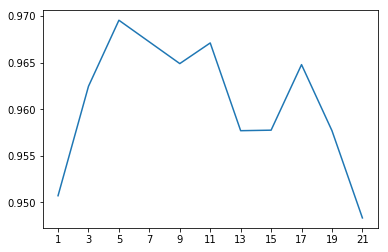

In [84]:
plt.plot(k_values,scores)
plt.xticks(k_values)
plt.show()

In [85]:
import numpy as np
k=k_values[np.array(scores).argmax()]
k  #this is the best k value

5

In [86]:
knn=KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [ ]:
#making own knn fn 

In [102]:
from collections import Counter
import numpy as np
def predict(x1,x_train,y_train,x_test,k,p):
    #loop through x_test for each x in x_test
    #find distance of x with each point in x_train
    #find k min distance indices
    #find class of these k points
    #find the majority class out of above classes.
    distances=[]
    j=0
    for x2 in x_train:
        distance=(x2-x1)
        distance=np.power(distance,p)
        distance=distance.sum()
        distances.append([distance,y_train[j]])
        j+=1
    distances=sorted(distances)
    firstKNeigh=[]
    for l in range(0,k,1):
        firstKNeigh.append(distances[l][1])
    return Counter(firstKNeigh).most_common(1)[0][0]
    
            
def knn(x_train,y_train,x_test,k,p):
    predictions=[]
    for x1 in x_test:
        predictions.append(predict(x1,x_train,y_train,x_test,k,p))
    return predictions
            
        

In [103]:
prediction=[]
prediction=knn(x_train,y_train,x_test,5,2)

In [104]:
prediction

[1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1]